# Capatone Project - Road Users Protection Improvement

## Background
In UK, over 1700 people were killed by traffic accidents every year, and hundreds of thousands injured. These accidents have torn families apart, troubled the communities, and damaged properties. There are many causes to traffic accidents such as bad road using habits or unsafe road design. It is everyone's responsibility to keep the road safe.

The UK Department for Transport revealed that the number of casualties remained broadly consistent in the last 10 years, except for a drop in 2020 due to lockdown for the coronavirus pandemic. The Department also discovered that the number of accidents changed along with traffic volumes.

In this project, we will look into different factors of the road, vehicle and casualty in order to find a pattern of the accidents. Then we can use that information to develop strategies to 
1. reduce the number of accidents
2. protect road users when an accident happens

## Dataset
Datasets:  
- Road Safety Data - Accidents 2019  
- Road Safety Data - Vehicles 2019  
- Road Safety Data - Casualties 2019  

Source: Department for Transport  
Link: https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data  
Volume: 117536 accidents, 71 Attributes  
Reliability: Very reliable  
Quality: High  
Data Generation: Info gathered by police  
Ongoing basis: No. New report published in every September

## Table of Contents
1. Import Libraries
2. Load Data
3. Clean Data
4. EDA  
    4.1 Accident Counts  
    4.2 Features vs Targets  
5. Prediction of Casualty Severity / Casualty Type
6. Identify Casualty Severity Groups by Roads
7. Conclusion

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sqlite3
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 2. Load Data

In [2]:
# Connect to SQL database
conn = sqlite3.connect("uk_road_2019.sqlite")
# Create a cursor
c = conn.cursor()

In [3]:
# Show database tables
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,accidents
1,vehicles
2,casualties


In [4]:
# Show table columns information
pd.read_sql_query("PRAGMA table_info(accidents);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id,varchar(255),1,None,1
1,1,accident_severity,varchar(255),0,None,0
2,2,no_of_casualties,varchar(255),0,None,0
3,3,road_class,varchar(255),0,None,0
4,4,road_type,varchar(255),0,None,0
5,5,speed_limit,varchar(255),0,None,0
6,6,junction_detail,varchar(255),0,None,0
7,7,junction_control,varchar(255),0,None,0
8,8,pedestrian_crossing_facilities,varchar(255),0,None,0
9,9,light_condition,varchar(255),0,None,0


In [5]:
pd.read_sql_query("PRAGMA table_info(vehicles);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id,varchar(255),1,None,0
1,1,vehicle_type,varchar(255),0,None,0
2,2,vehicle_manoeuvre,varchar(255),0,None,0
3,3,junction_location,varchar(255),0,None,0


In [6]:
pd.read_sql_query("PRAGMA table_info(casualties);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,id,varchar(255),1,None,0
1,1,casualty_class,varchar(255),0,None,0
2,2,casualty_severity,varchar(255),0,None,0
3,3,pedestrian_location,varchar(255),0,None,0
4,4,pedestrian_movement,varchar(255),0,None,0
5,5,casualty_type,varchar(255),0,None,0


In [7]:
# Show table size
query = ["SELECT COUNT(id) FROM accidents", 
         "SELECT COUNT(id) FROM vehicles", 
         "SELECT COUNT(id) FROM casualties"]

print("accidents, vehicles, casualties")
print([c.execute(i).fetchall()[0][0] for i in query])

accidents, vehicles, casualties
[108598, 200271, 143075]


In [8]:
# Load tables to dataframes
engine = create_engine("sqlite:///uk_road_2019.sqlite") 
df_acc = pd.read_sql("accidents", con=engine)
df_veh = pd.read_sql("vehicles", con=engine)
df_cas = pd.read_sql("casualties", con=engine)

In [9]:
df_acc

,id,accident_severity,no_of_casualties,road_class,road_type,speed_limit,junction_detail,junction_control,pedestrian_crossing_facilities,light_condition,weather_condition,road_surface_condition,urban_or_rural
0,2019010155191,Slight,1,"B \nMinor roads connect different areas, \nfee...",Single carriageway,30,T or staggered junction,Give way or uncontrolled,No crossing facilities,Darkness - lights lit,Fine \nno high winds,Dry,Urban
1,2019010155192,Serious,1,"B \nMinor roads connect different areas, \nfee...",Single carriageway,20,T or staggered junction,Give way or uncontrolled,No crossing facilities,Darkness - lights lit,Fine \nno high winds,Dry,Urban
2,2019010155194,Slight,2,A \nMajor roads,Single carriageway,30,Crossroads,Give way or uncontrolled,No crossing facilities,Darkness - lights lit,Fine \nno high winds,Dry,Urban
3,2019010155195,Slight,3,C \nSmaller roads connect \nunclassified roads...,Dual carriageway,30,Not at junction or within 20m,Give way or uncontrolled,No crossing facilities,Darkness - lights lit,Fine \nno high winds,Dry,Urban
4,2019010155196,Slight,1,A \nMajor roads,Single carriageway,30,Crossroads,Auto traffic signal,Pedestrian phase at traffic signal,Darkness - lights lit,Fine \nno high winds,Dry,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108593,2019984106919,Slight,1,"B \nMinor roads connect different areas, \nfee...",Single carriageway,60,Not at junction or within 20m,Give way or uncontrolled,No crossing facilities,Daylight,Fine \nno high winds,Wet or damp,Rural
108594,2019984107019,Slight,1,A \nMajor roads,Single carriageway,60,Not at junction or within 20m,Give way or uncontrolled,No crossing facilities,Daylight,Fine \nno high winds,Wet or damp,Rural
108595,2019984107219,Slight,1,"B \nMinor roads connect different areas, \nfee...",Single carriageway,60,T or staggered junction,Give way or uncontrolled,No crossing facilities,Daylight,Fine \nno high winds,Dry,Rural
108596,2019984107419,Slight,1,Unclassified,Single carriageway,30,T or staggered junction,Give way or uncontrolled,No crossing facilities,Daylight,Fine \nno high winds,Dry,Rural


In [10]:
df_veh

,id,vehicle_type,vehicle_manoeuvre,junction_location
0,2019010155191,Car,Waiting to go - held up,Approaching junction or \nwaiting/parked at ju...
1,2019010155191,Pedal cycle,Slowing or stopping,Approaching junction or \nwaiting/parked at ju...
2,2019010155192,Car,Going ahead other,Cleared junction or \nwaiting/parked at juncti...
3,2019010155194,Car,Going ahead other,Approaching junction or \nwaiting/parked at ju...
4,2019010155194,Car,Turning left,Cleared junction or \nwaiting/parked at juncti...
...,...,...,...,...
200266,2019984107019,Van / Goods 3.5 tonnes mgw or under,Going ahead other,Not at or within 20m of junction
200267,2019984107219,Car,Going ahead other,Approaching junction or \nwaiting/parked at ju...
200268,2019984107219,Car,Going ahead other,Approaching junction or \nwaiting/parked at ju...
200269,2019984107419,Car,Turning left,Entering main road


In [11]:
df_cas

,id,casualty_class,casualty_severity,pedestrian_location,pedestrian_movement,casualty_type
0,2019010155191,Passenger,Slight,Not a Pedestrian,Not a Pedestrian,Cyclist
1,2019010155192,Pedestrian,Serious,"In carriageway, crossing elsewhere",Crossing from offside \nmasked by vehicle,Pedestrian
2,2019010155194,Driver or rider,Slight,Not a Pedestrian,Not a Pedestrian,Car occupant
3,2019010155194,Passenger,Slight,Not a Pedestrian,Not a Pedestrian,Car occupant
4,2019010155195,Driver or rider,Slight,Not a Pedestrian,Not a Pedestrian,Car occupant
...,...,...,...,...,...,...
143070,2019984106919,Driver or rider,Slight,Not a Pedestrian,Not a Pedestrian,Goods vehicle \n(3.5 tonnes mgw and under) occ...
143071,2019984107019,Driver or rider,Slight,Not a Pedestrian,Not a Pedestrian,Goods vehicle \n(3.5 tonnes mgw and under) occ...
143072,2019984107219,Driver or rider,Slight,Not a Pedestrian,Not a Pedestrian,Car occupant
143073,2019984107419,Pedestrian,Slight,"In carriageway, crossing elsewhere",Crossing from offside,Pedestrian


## 3. Clean Data
See Capstone_DataCleaning.ipynb

## 4. EDA

**Features**  
Road Class, Road Type, Speed Limit, Junction Detail, Junction Control, Junction Location,  
Pedestrian Location, Pedestrian Movement, Pedestrian Crossing Facilities,  
Lighting, Weather, Road Surface, Urban or Rural, Vehicles Type, Vehicle Manoeuvre

**Targets**  
Accident Severity, No. of Casualties, Casualty Class, Casualty Severity, Casualty Type

### 4.1 Accident Counts

In [12]:
def basic_countplot(data, x, xlabel, rotation=0, order=None):
    fig = plt.figure(figsize=(20, 4))
    ax = sns.countplot(data=data, x=x, order=order)
    ax.set_xlabel(xlabel)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    ax.set_title("{} Accident Count".format(xlabel))
    plt.show()

#### Road Class

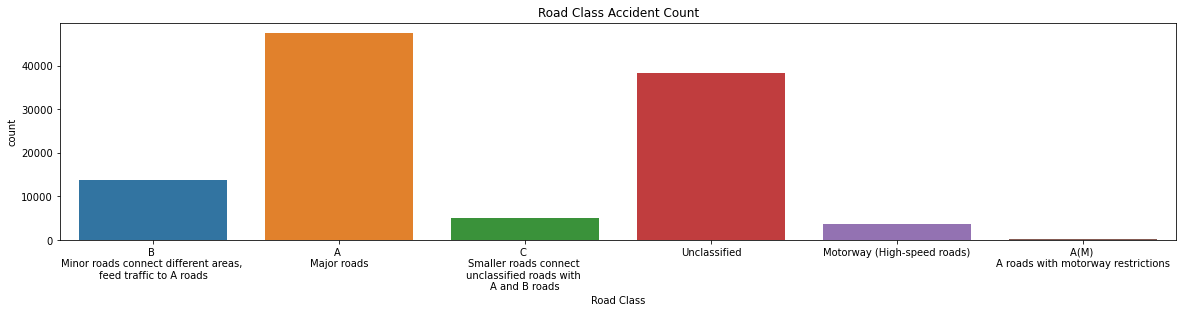

In [13]:
basic_countplot(df_acc, "road_class", "Road Class")

Most accients happened in main raod (class A) and unclassified road

#### Road Type

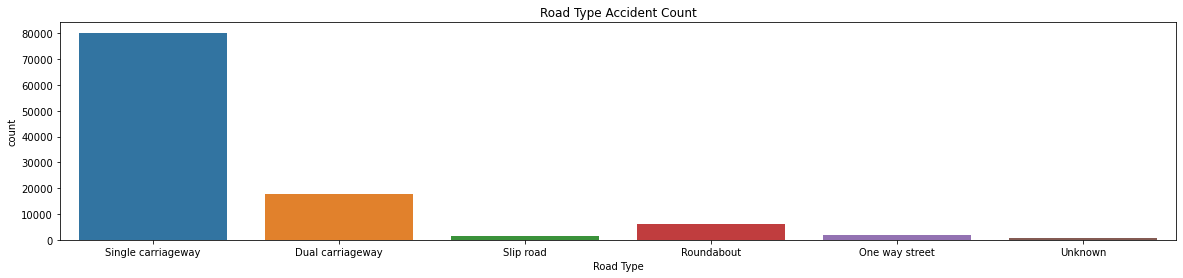

In [14]:
basic_countplot(df_acc, "road_type", "Road Type")

Most accidents happened in single carriageway

#### Speed Limit

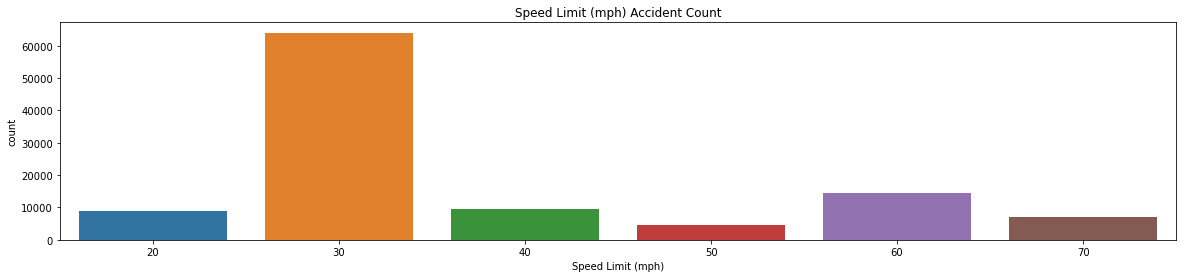

In [15]:
basic_countplot(df_acc, "speed_limit", "Speed Limit (mph)", order=np.sort(df_acc.speed_limit.unique()))

Most accidents happened on roads with speed limit of 30 mph (48.28 kmh)

#### Junction Detail

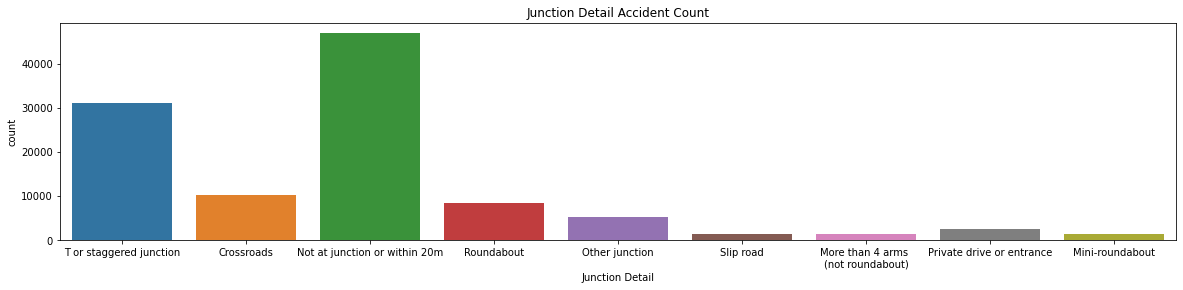

In [16]:
basic_countplot(df_acc, "junction_detail", "Junction Detail")

In [17]:
# Check percentage for each kind of junction
pd.read_sql_query("""
SELECT junction_detail, 
       COUNT(junction_detail) AS number_count,
       COUNT(junction_detail) * 100 / (SELECT COUNT(junction_detail) FROM accidents) AS percentage
FROM accidents
GROUP BY junction_detail 
ORDER BY percentage DESC;
""", conn)

,junction_detail,number_count,percentage
0,Not at junction or within 20m,46888,43
1,T or staggered junction,30989,28
2,Crossroads,10163,9
3,Roundabout,8451,7
4,Other junction,5288,4
5,Private drive or entrance,2599,2
6,Slip road,1340,1
7,More than 4 arms \n(not roundabout),1395,1
8,Mini-roundabout,1485,1


Over 40% of the accidents happened not at a junction and about one-third at T or staggered junction.

#### Junction Control

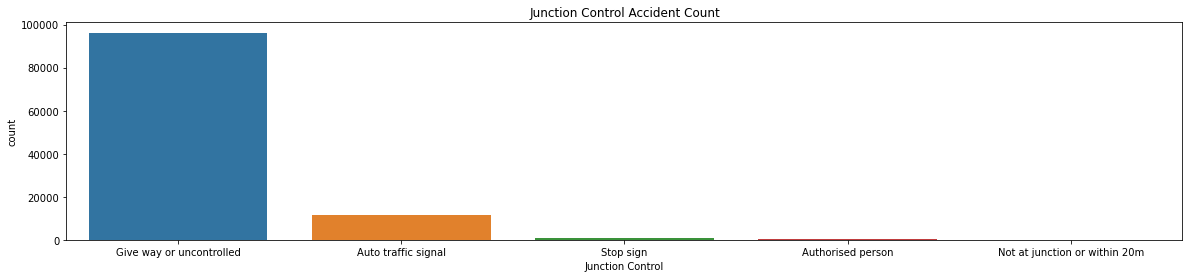

In [18]:
basic_countplot(df_acc, "junction_control", "Junction Control")

In [19]:
# Check percentage for each junction control
pd.read_sql_query("""
SELECT junction_control, 
       COUNT(junction_control) AS number_count,
       COUNT(junction_control) * 100 / (SELECT COUNT(junction_control) FROM accidents) AS percentage
FROM accidents
GROUP BY junction_control 
ORDER BY percentage DESC;
""", conn)

,junction_control,number_count,percentage
0,Give way or uncontrolled,96233,88
1,Auto traffic signal,11347,10
2,Stop sign,660,0
3,Not at junction or within 20m,4,0
4,Authorised person,354,0


A large portion of "Give way or uncontrolled" was found. Break it down for further investigation.

In [20]:
# Accident count per junction type and control method
df_juncctrl = pd.read_sql_query("""
SELECT junction_detail, junction_control, COUNT(id) AS number_count 
FROM accidents 
WHERE junction_detail <> "Not at junction or within 20m" 
GROUP BY junction_detail, junction_control 
ORDER BY junction_detail, number_count DESC;
""", conn)

df_juncctrl

,junction_detail,junction_control,number_count
0,Crossroads,Give way or uncontrolled,5033
1,Crossroads,Auto traffic signal,4879
2,Crossroads,Stop sign,193
3,Crossroads,Authorised person,58
4,Mini-roundabout,Give way or uncontrolled,1455
5,Mini-roundabout,Auto traffic signal,17
6,Mini-roundabout,Authorised person,9
7,Mini-roundabout,Stop sign,4
8,More than 4 arms \n(not roundabout),Auto traffic signal,788
9,More than 4 arms \n(not roundabout),Give way or uncontrolled,570


<Figure size 1152x288 with 0 Axes>

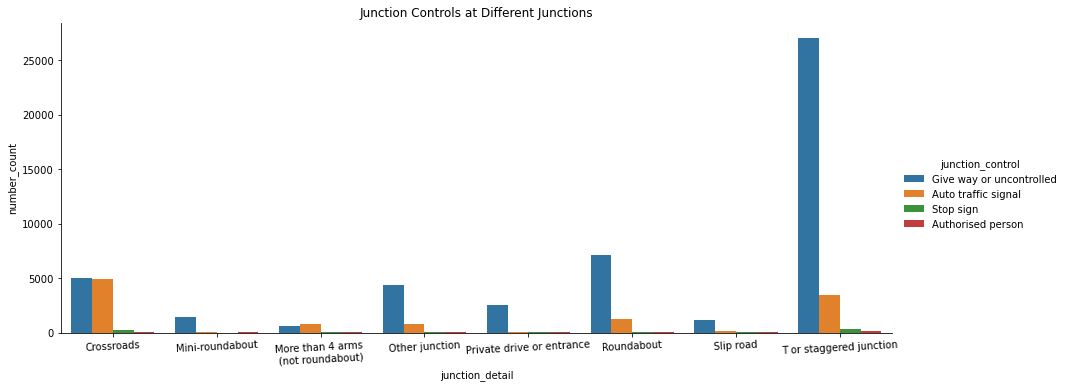

In [21]:
fig = plt.figure(figsize=(16, 4))
ax = sns.catplot(data=df_juncctrl, x="junction_detail", y="number_count", hue="junction_control", kind="bar", aspect=2.5)
ax.set_xticklabels(rotation=3)
plt.title("Junction Controls at Different Junctions")
plt.show()

Most junction accidents happened at junctions that relied on Give Way sign or have no control, while a small portion of the junctions had auto traffic signal.

#### Junction Location

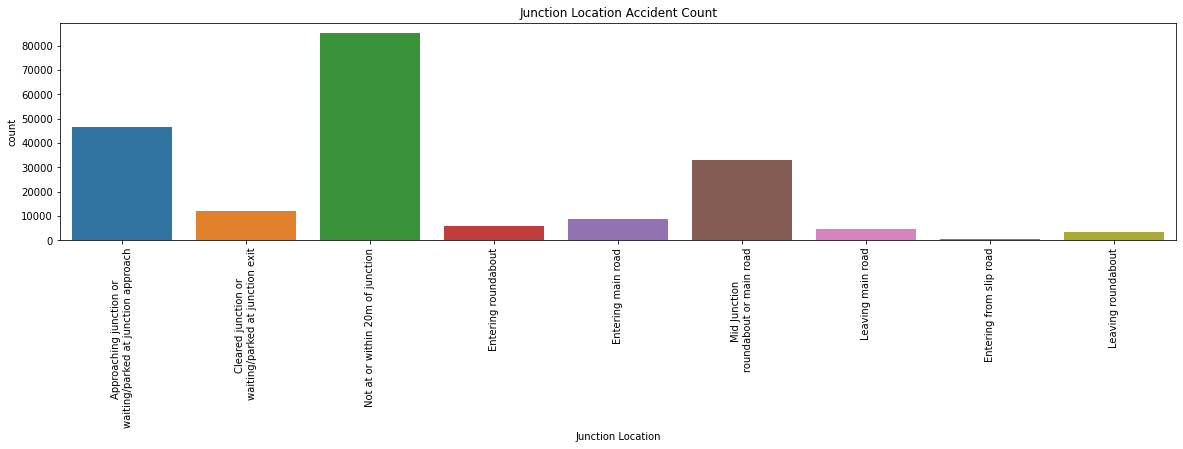

In [22]:
basic_countplot(df_veh, "junction_location", "Junction Location", 90)

Most junction accidents happened when the vehicles were approaching / stopped near a junction, or when the vehicles were in the mid-junction.  
Much fewer accidents happened when vehicles were entering / leaving junction. It might be because drivers were more cautious when they were entering or leaving a junction.

#### Pedestrian

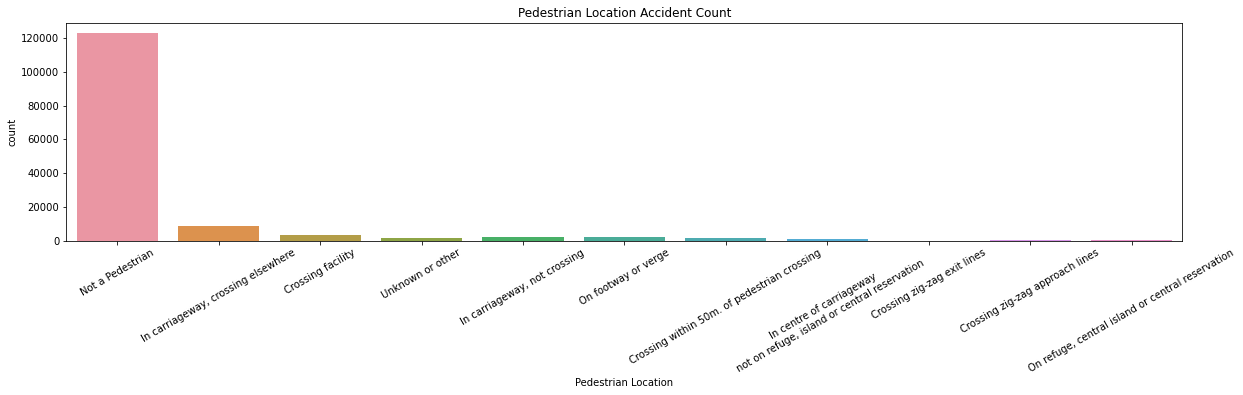

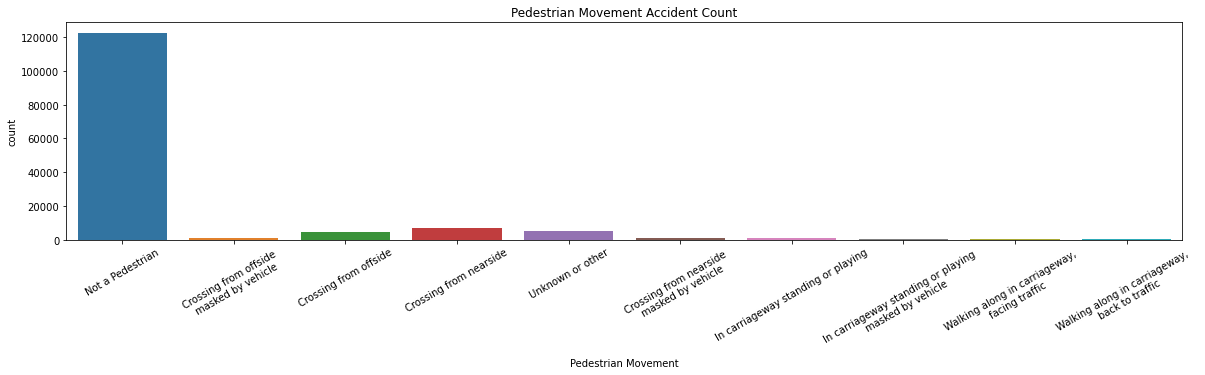

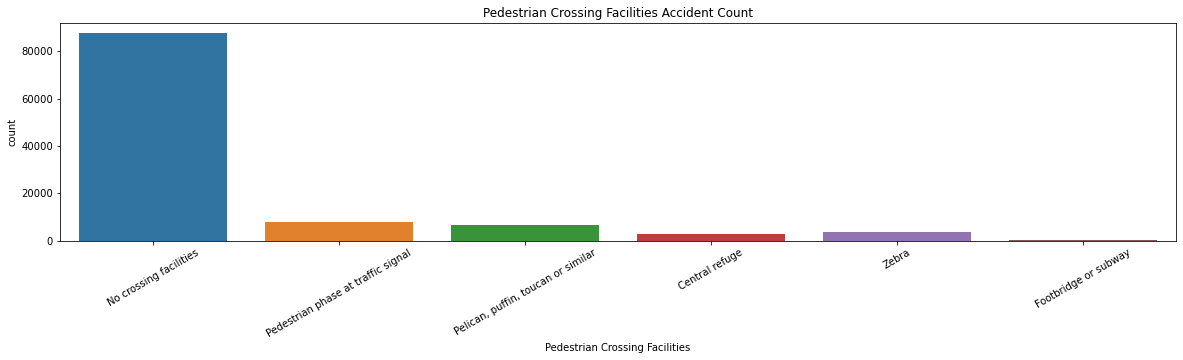

In [23]:
basic_countplot(df_cas, "pedestrian_location", "Pedestrian Location", 30)
basic_countplot(df_cas, "pedestrian_movement", "Pedestrian Movement", 30)
basic_countplot(df_acc, "pedestrian_crossing_facilities", "Pedestrian Crossing Facilities", 30)

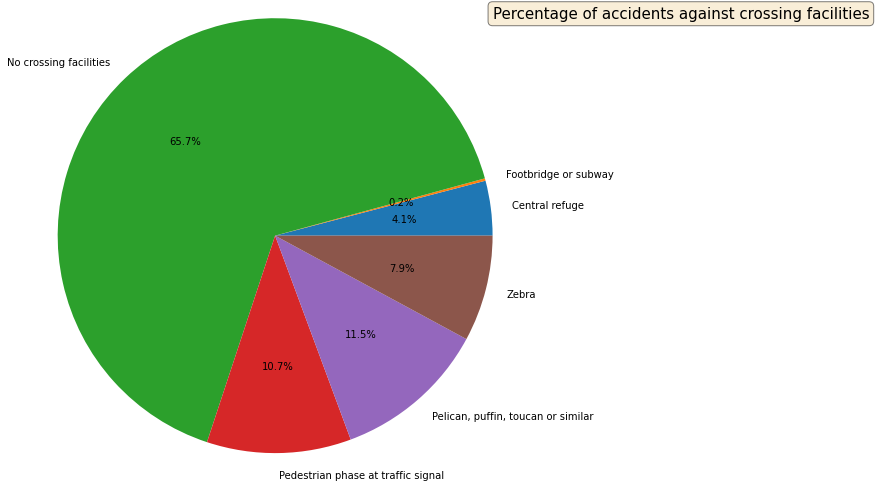

In [24]:
# Road accidents with pedestrian involved 
df = pd.read_sql_query("""
SELECT pedestrian_crossing_facilities, 
       COUNT(pedestrian_crossing_facilities) AS count 
FROM accidents INNER JOIN casualties ON accidents.id = casualties.id 
WHERE casualty_class = "Pedestrian" 
GROUP BY pedestrian_crossing_facilities;
""", conn)

fig = plt.figure()
plt.pie(x=df["count"], labels=df["pedestrian_crossing_facilities"], autopct="%.1f%%", radius=2.5)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2.5, 2.5, "Percentage of accidents against crossing facilities", size=15, bbox=props)
plt.show()

The casualties record showed that most casualties were not pedestrian. On the other hand, pedestrian who used crossing facilities had less chance getting in an accident. Obviously, using footbridge or subway is the safest way to cross a road.

Regarding pedestrian movement, crossing from offside and nearside had similar accident chance. However, the chance of accident was much lower when the pedestrians were masked by stationed vehicles. It might be because pedestrians were more alert in those situations.

When pedestrians were not crossing, even they were standing / playing on the road or walking along the road, the chance of road accident was still quite low. Further look into the pedestrian movement below.

In [25]:
df_crossing = pd.read_sql_query("""
SELECT pedestrian_movement, 
       COUNT(pedestrian_movement) AS count, 
       COUNT(pedestrian_movement) * 100 / (SELECT COUNT(pedestrian_movement) FROM casualties WHERE pedestrian_movement <> "Not a Pedestrian") AS percentage 
FROM casualties 
WHERE pedestrian_movement <> "Not a Pedestrian" 
GROUP BY pedestrian_movement 
ORDER BY percentage DESC;
""", conn)

df_crossing

,pedestrian_movement,count,percentage
0,Crossing from nearside,6894,33
1,Unknown or other,5090,25
2,Crossing from offside,4427,21
3,Crossing from nearside \nmasked by vehicle,1170,5
4,In carriageway standing or playing,955,4
5,Crossing from offside \nmasked by vehicle,862,4
6,"Walking along in carriageway, \nback to traffic",445,2
7,"Walking along in carriageway, \nfacing traffic",335,1
8,In carriageway standing or playing \nmasked by...,155,0


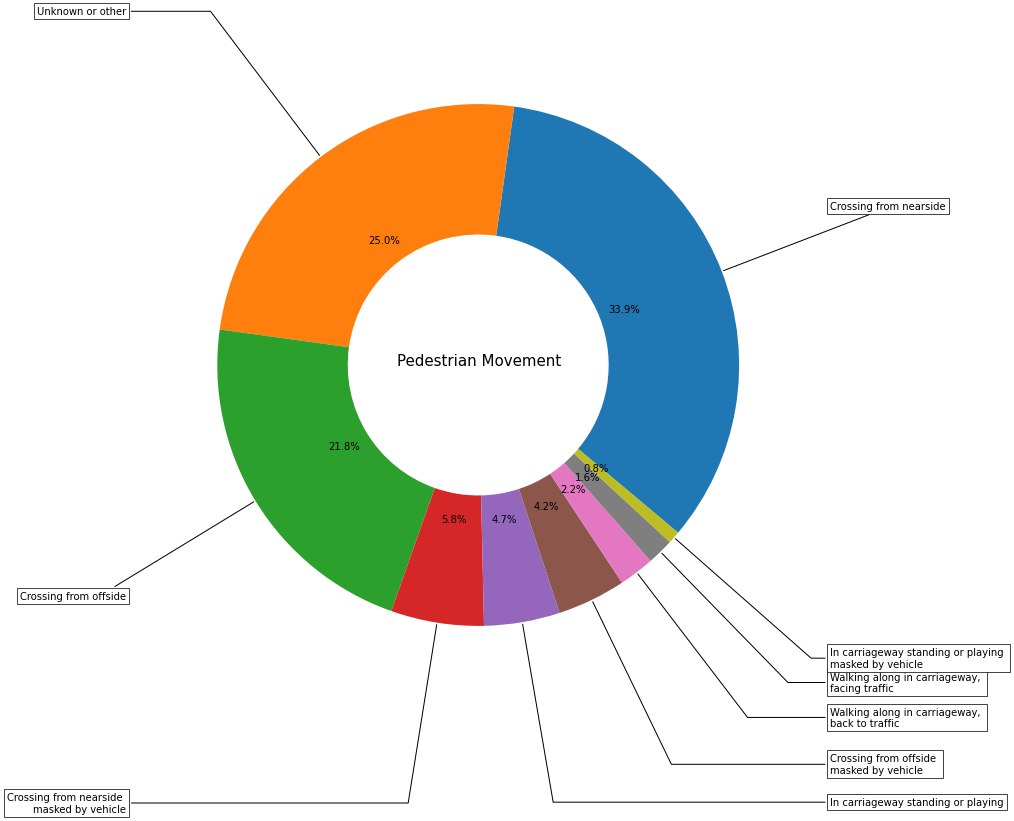

In [26]:
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))

wedges, texts, percent = ax.pie(df_crossing["count"], wedgeprops=dict(width=0.5), startangle=-40, autopct="%.1f%%")

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(df_crossing["pedestrian_movement"][i], xy=(x, y), xytext=(1.35*np.sign(x), 1.7*y),
                horizontalalignment=horizontalalignment, **kw)

ax.text(-0.31, 0, "Pedestrian Movement", size=15)

plt.show()

#### Lighting, Weather and Road Surface Condition

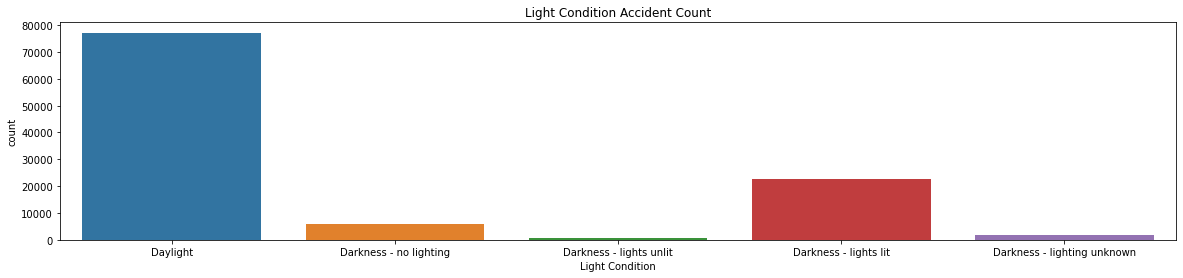

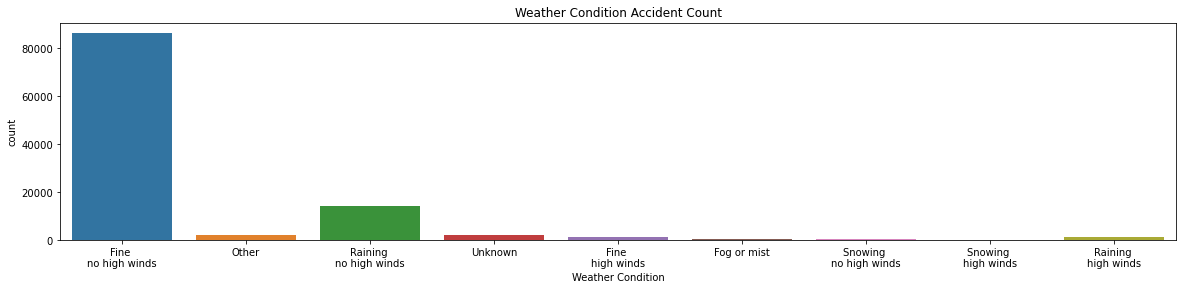

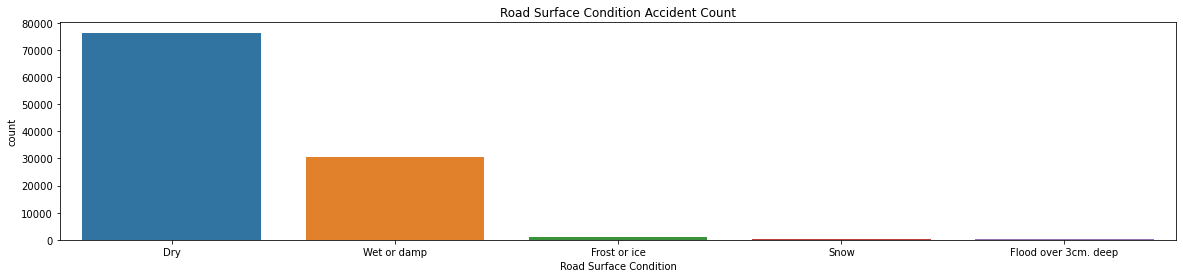

In [27]:
basic_countplot(df_acc, "light_condition", "Light Condition", order=np.sort(df_acc.light_condition.unique())[::-1])
basic_countplot(df_acc, "weather_condition", "Weather Condition")
basic_countplot(df_acc, "road_surface_condition", "Road Surface Condition")

In [28]:
# Accidents number under different environmental conditions
pd.read_sql_query("""
SELECT light_condition AS light, 
       weather_condition AS weather, 
       road_surface_condition AS surface, 
       COUNT(id) AS number, 
       COUNT(id) * 100 / (SELECT COUNT(id) FROM accidents) AS percentage 
FROM accidents 
GROUP BY light, weather, surface 
ORDER BY number DESC 
LIMIT 20;
""", conn)

,light,weather,surface,number,percentage
0,Daylight,Fine \nno high winds,Dry,56858,52
1,Darkness - lights lit,Fine \nno high winds,Dry,11857,10
2,Daylight,Raining \nno high winds,Wet or damp,7646,7
3,Daylight,Fine \nno high winds,Wet or damp,7285,6
4,Darkness - lights lit,Raining \nno high winds,Wet or damp,4604,4
5,Darkness - lights lit,Fine \nno high winds,Wet or damp,4047,3
6,Darkness - no lighting,Fine \nno high winds,Dry,2540,2
7,Darkness - no lighting,Fine \nno high winds,Wet or damp,1382,1
8,Daylight,Unknown,Dry,1332,1
9,Darkness - no lighting,Raining \nno high winds,Wet or damp,1197,1


The record showed that over half of the accidents happened under good road condition (daylight, fine weather with no high wind, dry road), suggested the road condition does not have a huge influence to accidents.

#### Urban or Rural

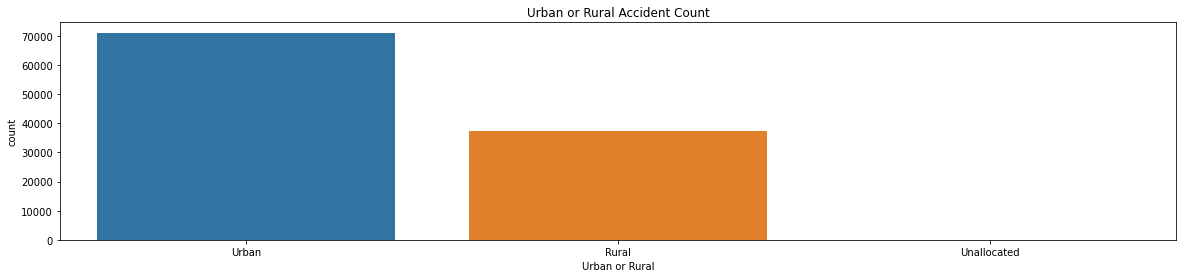

In [29]:
basic_countplot(df_acc, "urban_or_rural", "Urban or Rural")

The number of accidents in urban area was about twice compare to rural area.

#### Vehicles Type

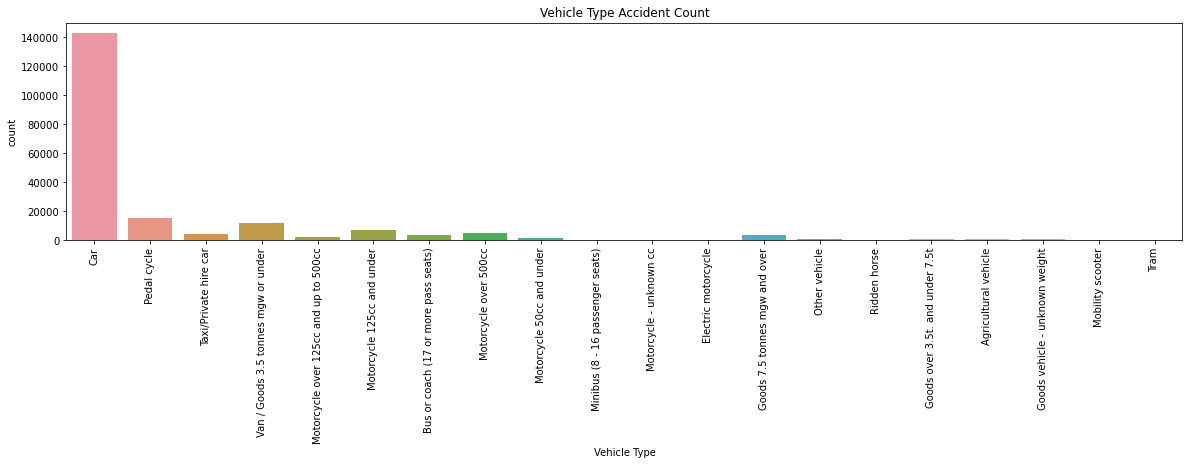

In [30]:
basic_countplot(df_veh, "vehicle_type", "Vehicle Type", 90)

The majority of vehicles involved in the accidents were normal cars. Among the other vehicle types, bicycles and vans had a relatively higher number of getting involved in an accident.

#### Vehicle Manoeuvre

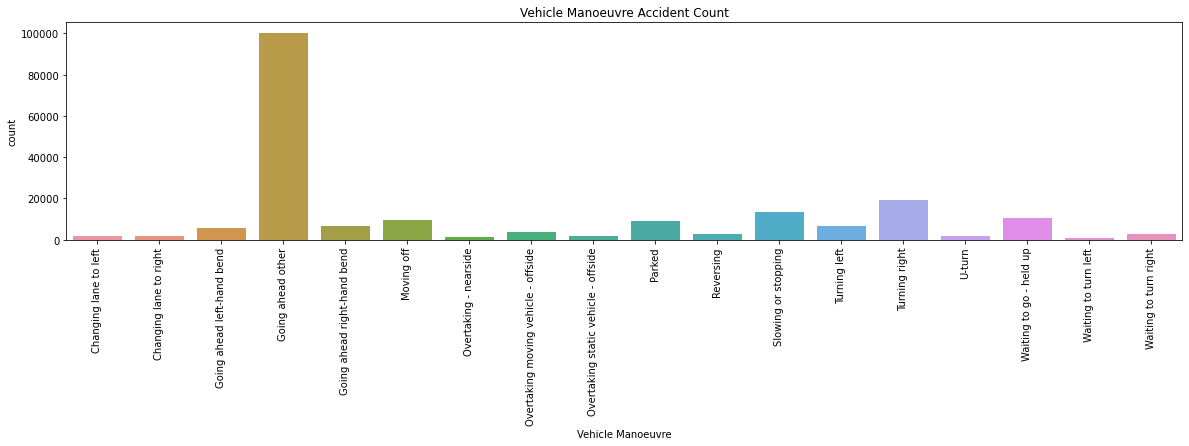

In [31]:
basic_countplot(df_veh, "vehicle_manoeuvre", "Vehicle Manoeuvre", 90, order=np.sort(df_veh.vehicle_manoeuvre.unique()))

Most accidents happened when the vehicles were going ahead. Interestingly, there were more than a double of vehicles got in accidents when turning right than turning left. Lastly, quite a few accidents happened when the vehicles were station, slowing down or moving off.

#### Who got injured

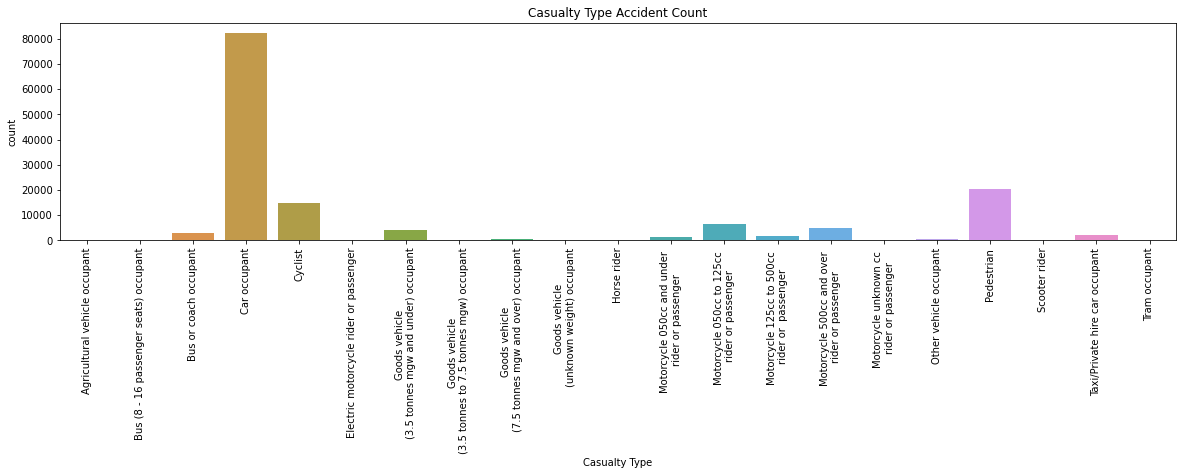

In [32]:
basic_countplot(df_cas, "casualty_type", "Casualty Type", 90, order=np.sort(df_cas.casualty_type.unique()))

Most casualties were vehicle occpants, while pedestrians and cyclists should also be awared. We will now further look into casualty severity.

In [33]:
# Casualty severity count per road user class
df = pd.read_sql_query("""
SELECT casualty_class, 
       casualty_severity, 
       COUNT(casualty_class) AS count 
FROM casualties 
GROUP BY casualty_class, casualty_severity;
""", conn)

df

,casualty_class,casualty_severity,count
0,Driver or rider,Fatal,1012
1,Driver or rider,Serious,15802
2,Driver or rider,Slight,75224
3,Passenger,Fatal,269
4,Passenger,Serious,3919
5,Passenger,Slight,26518
6,Pedestrian,Fatal,470
7,Pedestrian,Serious,5622
8,Pedestrian,Slight,14239


In [34]:
# Calculate the percentage of casualty severity within the same group (casualty class)
driver_sum = df[df["casualty_class"] == "Driver or rider"]["count"].sum()
passenger_sum = df[df["casualty_class"] == "Passenger"]["count"].sum()
ped_sum = df[df["casualty_class"] == "Pedestrian"]["count"].sum()

for i in df.index:
    if df.loc[i, "casualty_class"] == "Driver or rider":
        df.loc[i, "percentage_within_group"] = round(df.loc[i, "count"] * 100 / driver_sum, 2)
    elif df.loc[i, "casualty_class"] == "Passenger":
        df.loc[i, "percentage_within_group"] = round(df.loc[i, "count"] * 100 / passenger_sum, 2)
    else:
        df.loc[i, "percentage_within_group"] = round(df.loc[i, "count"] * 100 / ped_sum, 2)
        
df

,casualty_class,casualty_severity,count,percentage_within_group
0,Driver or rider,Fatal,1012,1.10
1,Driver or rider,Serious,15802,17.17
2,Driver or rider,Slight,75224,81.73
3,Passenger,Fatal,269,0.88
4,Passenger,Serious,3919,12.76
5,Passenger,Slight,26518,86.36
6,Pedestrian,Fatal,470,2.31
7,Pedestrian,Serious,5622,27.65
8,Pedestrian,Slight,14239,70.04


The large amount of injured drivers or riders corresponded to the large number of solo drivers.  

It was found that most injuries were slight injury for all road users, although pedestrian had a relatively higher rate of receiving serious or fatal injury. In contrast, passenger had less chance getting serious or fatal injury.  

In order to reduce fatal / serious injury, we should 
- Reduce the number of accidents
- Protect pedestrians from accidents

### 4.2 Features vs Targets

In this section, we will look into the what factors lead to severe injuries.

In [35]:
# Common catplot
def factor_severity(factor, table, title="NA", rotation=0):
    
    # Common query for casualty != "Slight"
    query_no_slight = """
    SELECT {0}, 
           casualty_severity, 
           COUNT(casualty_severity) AS count 
    FROM {1} INNER JOIN casualties on {1}.id = casualties.id 
    WHERE casualty_severity <> "Slight"
    GROUP BY {0}, casualty_severity 
    ORDER BY count DESC;
    """

    # Factor and Casualty Severity
    df = pd.read_sql_query(query_no_slight.format(factor, table), conn)

    # Plot
    ax = sns.catplot(data=df, x=factor, y="count", hue="casualty_severity", kind="bar", aspect=2.5)
    ax.set_xticklabels(rotation=rotation)
    plt.title(title)
    plt.show()

#### No Significance

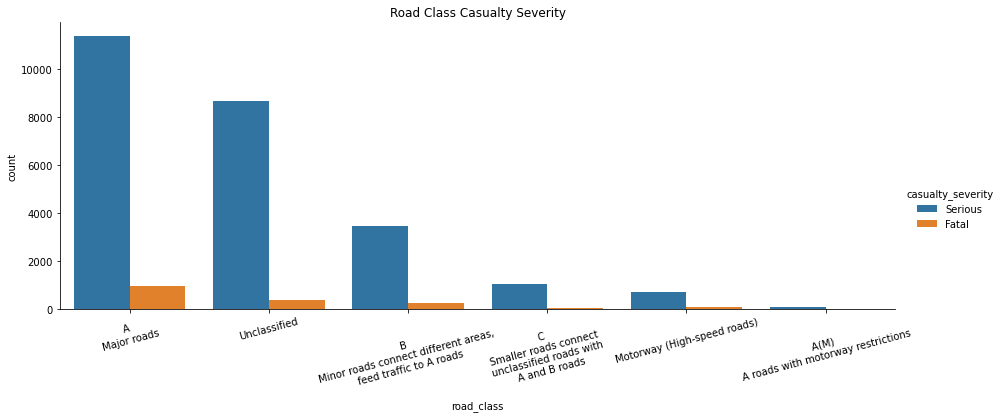

In [36]:
# Road Class and Casualty Severity
factor_severity("road_class", "accidents", "Road Class Casualty Severity", 15)

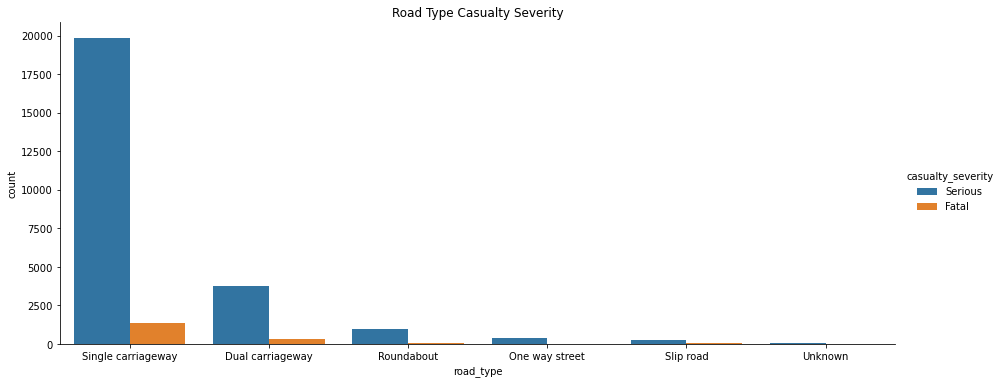

In [37]:
# Road Type and Casualty Severity
factor_severity("road_type", "accidents", "Road Type Casualty Severity")

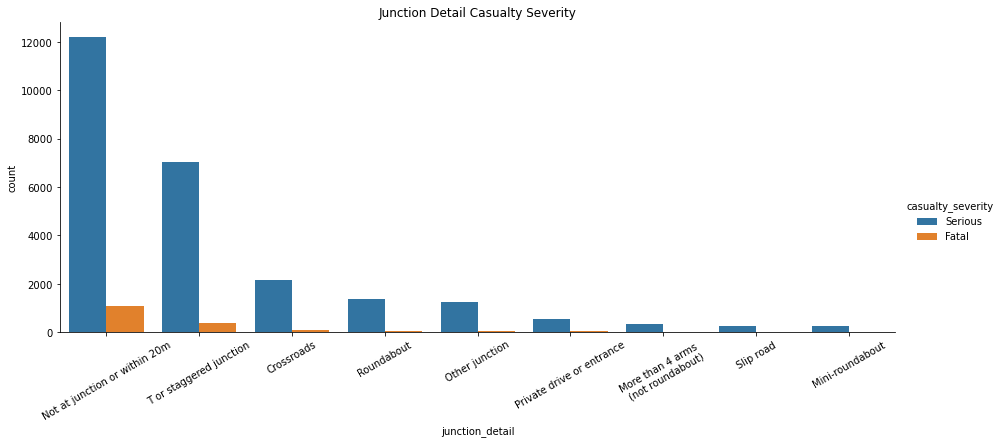

In [38]:
# Junction Detail and Casualty Severity
factor_severity("junction_detail", "accidents", "Junction Detail Casualty Severity", 30)

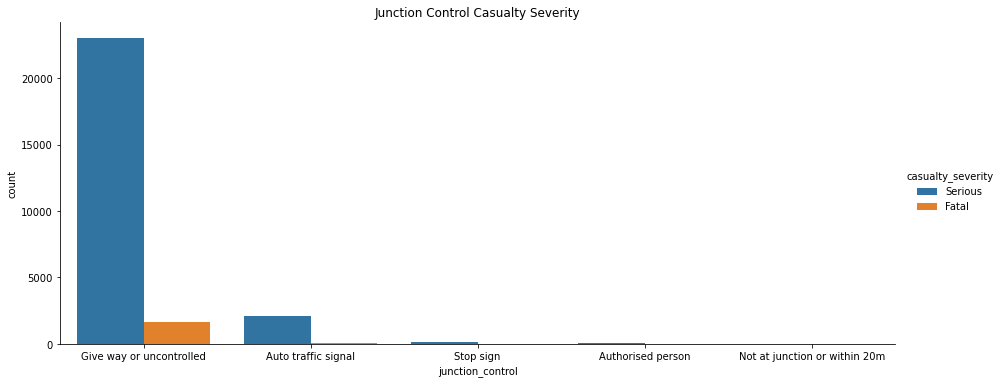

In [39]:
# Junction Control and Casualty Severity 
factor_severity("junction_control", "accidents", "Junction Control Casualty Severity")

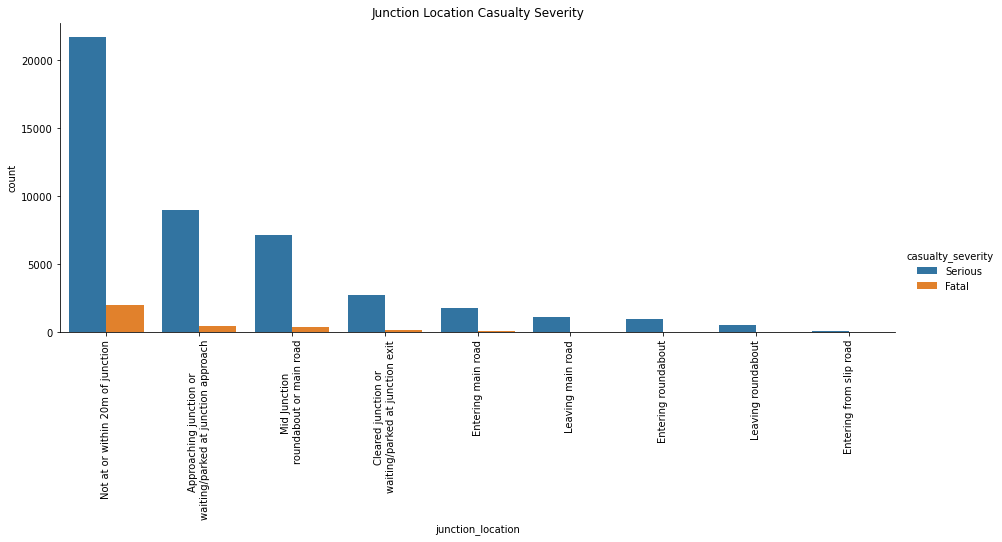

In [40]:
# Junction Location
factor_severity("junction_location", "vehicles", "Junction Location Casualty Severity", 90)

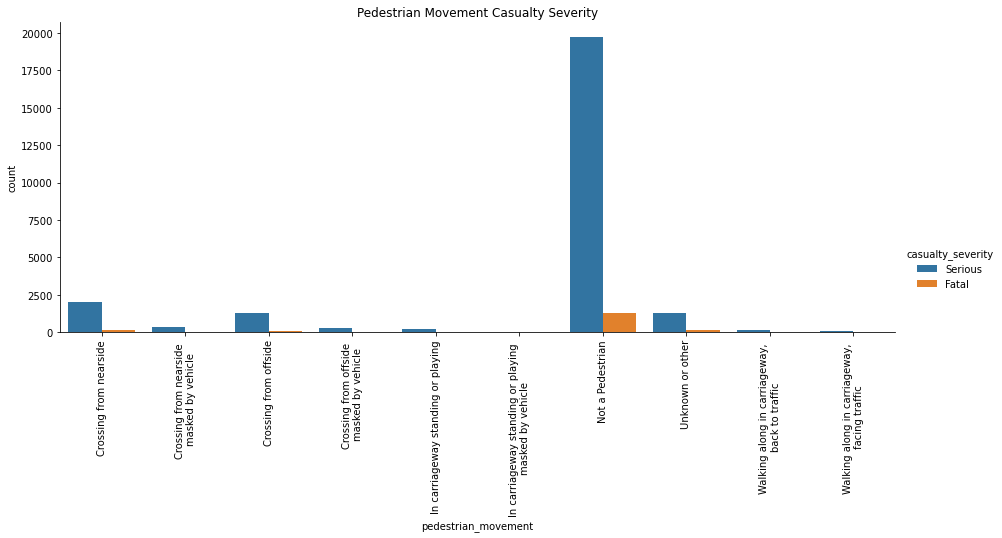

In [41]:
# Pedestrian Movement
df = pd.read_sql_query("""
SELECT pedestrian_movement, 
       casualty_severity, 
       COUNT(casualty_severity) AS count 
FROM casualties 
WHERE casualty_severity <> "Slight"
GROUP BY pedestrian_movement, casualty_severity;
""", conn)

# Plot
ax = sns.catplot(data=df, x="pedestrian_movement", y="count", hue="casualty_severity", kind="bar", aspect=2.5, 
                 order=np.sort(df.pedestrian_movement.unique()), hue_order=["Serious", "Fatal"])
ax.set_xticklabels(rotation=90)
plt.title("Pedestrian Movement Casualty Severity")
plt.show()

No significance found from the figures above

#### Speed Limit

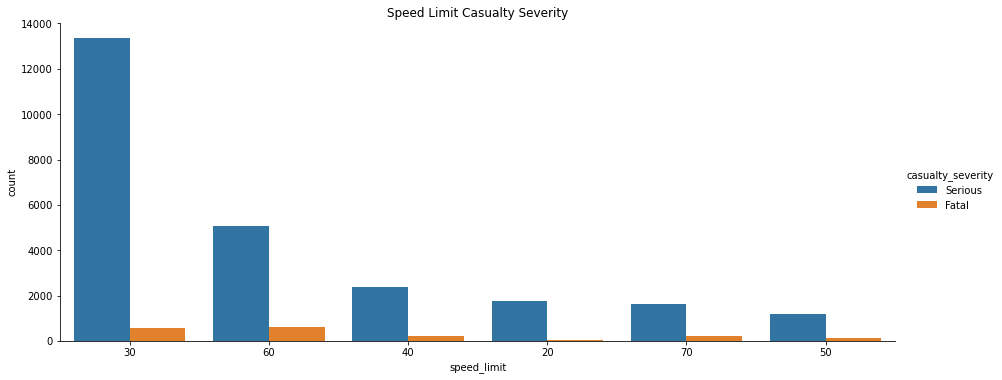

In [42]:
# Speed Limit and Casualty Severity
factor_severity("speed_limit", "accidents", "Speed Limit Casualty Severity")

Although most accidents happened on the roads with speed limit 30 mph, the death number of 60 mph roads was similar to it. It suggests that accidents on fast roads may be more fatal.

In [43]:
# Check casualty count for 60 mph and 30 mph
df = pd.read_sql_query("""
SELECT accidents.speed_limit, 
       casualties.casualty_severity, 
       COUNT(casualties.casualty_severity) AS count 
FROM accidents INNER JOIN casualties on accidents.id = casualties.id 
GROUP BY speed_limit, casualty_severity 
ORDER BY speed_limit DESC;
""", conn)

# Total count
df_sum = df.groupby(["speed_limit"]).sum()

# Calculate percentage within group
for i in df.index:
    if df.loc[i, "speed_limit"] == "70":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["70"][0]
    elif df.loc[i, "speed_limit"] == "60":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["60"][0]
    elif df.loc[i, "speed_limit"] == "50":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["50"][0]
    elif df.loc[i, "speed_limit"] == "40":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["40"][0]
    elif df.loc[i, "speed_limit"] == "30":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["30"][0]
    else:
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["20"][0]

df.round({"percentage": 1})

,speed_limit,casualty_severity,count,percentage
0,70,Fatal,215,1.9
1,70,Serious,1615,14.5
2,70,Slight,9284,83.5
3,60,Fatal,595,2.7
4,60,Serious,5047,23.2
5,60,Slight,16103,74.1
6,50,Fatal,123,1.8
7,50,Serious,1177,17.5
8,50,Slight,5425,80.7
9,40,Fatal,199,1.5


<Figure size 1152x288 with 0 Axes>

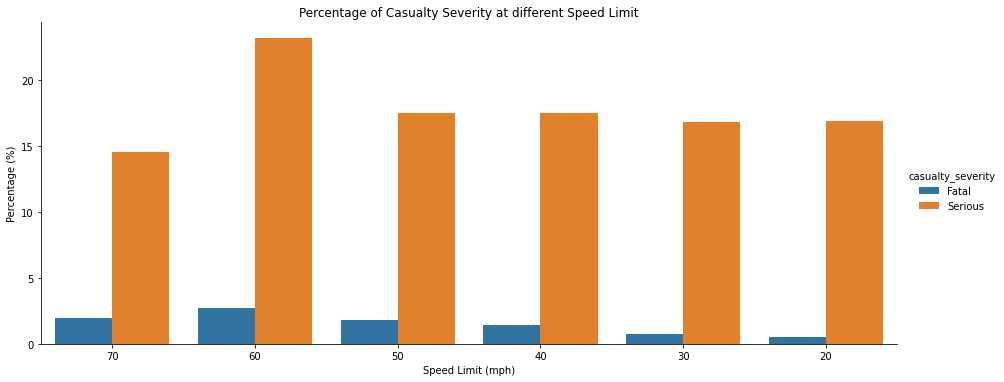

In [44]:
fig = plt.figure(figsize=(16, 4))
ax = sns.catplot(data=df[df["casualty_severity"]!="Slight"], x="speed_limit", y="percentage", hue="casualty_severity", kind="bar", aspect=2.5)
plt.title("Percentage of Casualty Severity at different Speed Limit")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Percentage (%)")
plt.show()

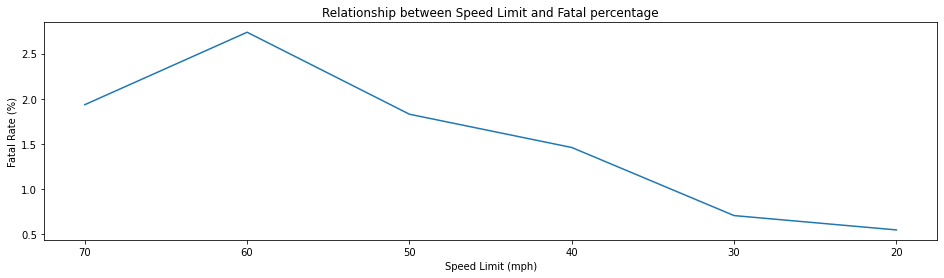

In [45]:
# Relationship between Speed Limit and Fatal percentage
df_line = df[df["casualty_severity"] == "Fatal"]

fig = plt.figure(figsize=(16, 4))
sns.lineplot(data=df_line, x="speed_limit", y="percentage")
plt.title("Relationship between Speed Limit and Fatal percentage")
plt.xlabel("Speed Limit (mph)")
plt.ylabel("Fatal Rate (%)")
plt.show()

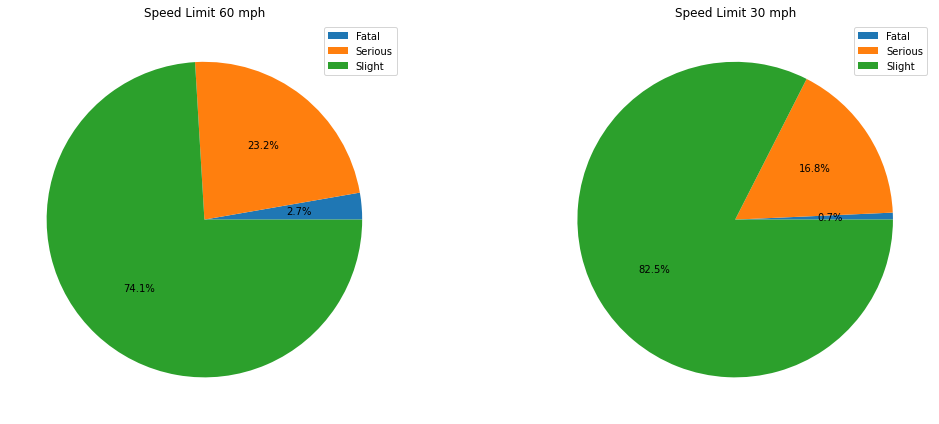

In [46]:
fig = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.pie(x=df[df["speed_limit"] == "60"]["count"], autopct="%.1f%%")
plt.title("Speed Limit 60 mph")
plt.legend(["Fatal", "Serious", "Slight"], loc="upper right")

plt.subplot(1, 2, 2)
plt.pie(x=df[df["speed_limit"] == "30"]["count"], autopct="%.1f%%")
plt.title("Speed Limit 30 mph")
plt.legend(["Fatal", "Serious", "Slight"], loc="upper right")

plt.tight_layout()
plt.show()

The fatal and severe casualty rate of 60 mph was much higher than 30 mph.

#### Pedestrian Crossing Facilities

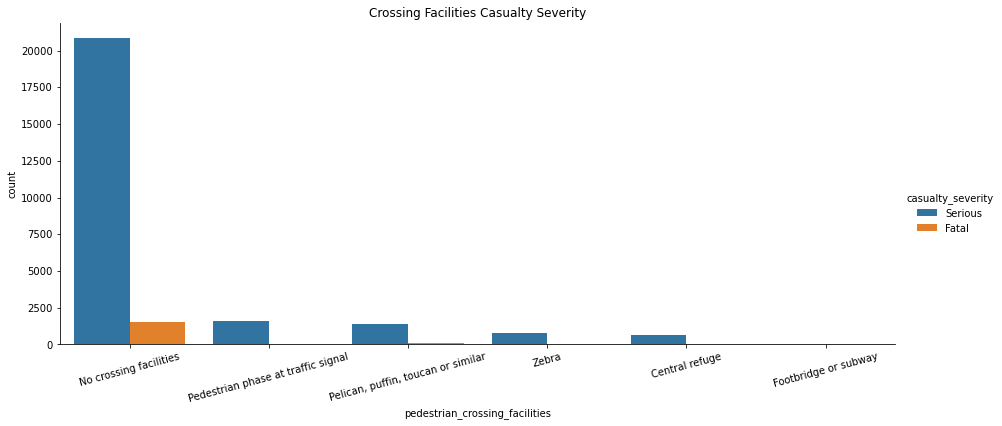

In [47]:
# Pedestrian Crossing Facilities
factor_severity("pedestrian_crossing_facilities", "accidents", "Crossing Facilities Casualty Severity", 15)

Pedestrians who used crossing facilities seemed to get less fatal damage. Look further into the percentage of casualty severity

<Figure size 1152x288 with 0 Axes>

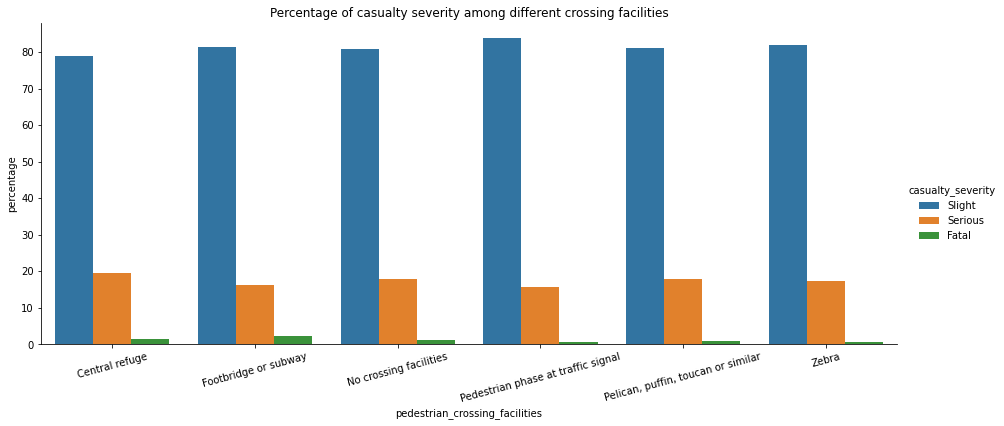

In [48]:
df = pd.read_sql_query("""
SELECT pedestrian_crossing_facilities, 
       casualty_severity, 
       COUNT(casualty_severity) as count 
FROM accidents INNER JOIN casualties ON accidents.id = casualties.id 
GROUP BY pedestrian_crossing_facilities, casualty_severity;
""", conn)

# Total count
df_sum = df.groupby(["pedestrian_crossing_facilities"]).sum()

# Calculate percentage within group
for i in df.index:
    if df.loc[i, "pedestrian_crossing_facilities"] == "Central refuge":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["Central refuge"][0]
    elif df.loc[i, "pedestrian_crossing_facilities"] == "Footbridge or subway":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["Footbridge or subway"][0]
    elif df.loc[i, "pedestrian_crossing_facilities"] == "No crossing facilities":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["No crossing facilities"][0]
    elif df.loc[i, "pedestrian_crossing_facilities"] == "Pedestrian phase at traffic signal":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["Pedestrian phase at traffic signal"][0]
    elif df.loc[i, "pedestrian_crossing_facilities"] == "Pelican, puffin, toucan or similar":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["Pelican, puffin, toucan or similar"][0]
    else:
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["Zebra"][0]

# Plot
fig = plt.figure(figsize=(16, 4))
ax = sns.catplot(data=df, x="pedestrian_crossing_facilities", y="percentage", hue="casualty_severity", kind="bar", aspect=2.5, 
                 hue_order=["Slight", "Serious", "Fatal"])
ax.set_xticklabels(rotation=15)
plt.title("Percentage of casualty severity among different crossing facilities")
plt.show()

The percentage of casualty severity between different groups were very similar. That means crossing facilities do not provide protection to pedestrians, but greatly reduce chance of accidents instead.

#### Road User

We will focus on Pedestrian, Cyclist and Car Occupant since they are the top three casualty groups

<Figure size 1152x288 with 0 Axes>

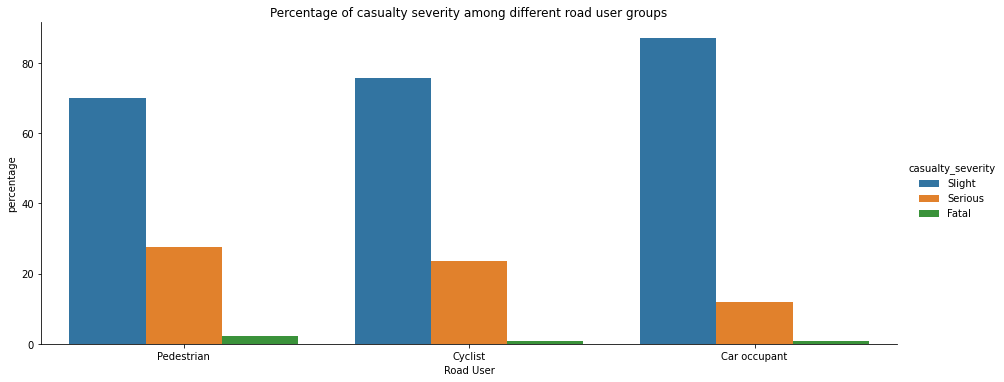

In [49]:
# Road User Type
df = pd.read_sql_query("""
SELECT casualty_type, 
       casualty_severity, 
       COUNT(casualty_severity) AS count 
FROM casualties 
WHERE casualty_type IN ("Pedestrian", "Cyclist", "Car occupant") 
GROUP BY casualty_type, casualty_severity 
ORDER BY casualty_type DESC;
""", conn)

# Total count
df_sum = df.groupby(["casualty_type"]).sum()

# Calculate percentage within group
for i in df.index:
    if df.loc[i, "casualty_type"] == "Pedestrian":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["Pedestrian"][0]
    elif df.loc[i, "casualty_type"] == "Cyclist":
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["Cyclist"][0]
    else:
        df.loc[i, "percentage"] = df.loc[i, "count"] * 100 / df_sum.loc["Car occupant"][0]

# Plot
fig = plt.figure(figsize=(16, 4))
ax = sns.catplot(data=df, x="casualty_type", y="percentage", hue="casualty_severity", kind="bar", aspect=2.5, 
                 hue_order=["Slight", "Serious", "Fatal"])
plt.title("Percentage of casualty severity among different road user groups")
plt.xlabel("Road User")
plt.show()

As expected, pedestrians had higher chance to suffer serious and fatal damage. Cyclists was slightly better than pedestrian, might be because of their protective gear. Car Occupants were protected by the car frame hence less serious damage. However, the death rate of Car Occupants was slightly higher than Cyclist; this could be because of the faster speed of cars.

## 5. Prediction of Casualty Severity / Casualty Type
See Capstone_Modelling.ipynb
## 6. Identify Casualty Severity Groups by Roads
See Capstone_Modelling.ipynb
## 7. Conclusion
See Report.docx